In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Load in data, and separate features and label
data = pd.read_csv("../book_source/source/classification/ensembles/income.csv")
label = "income"
features = data.columns[data.columns != label]

# Train test split
train_data, test_data, train_labels, test_labels = train_test_split(
    data[features], data[label], test_size=0.2)

# Transform categorical features. Note that we use the same transformation
# on both train and test
encoder = OneHotEncoder(handle_unknown='ignore')\
    .fit(train_data)
train_data = encoder.transform(train_data)
test_data = encoder.transform(test_data)

# Train model
model = RandomForestClassifier(n_estimators=200)
model.fit(train_data, train_labels)

# Make predictions
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

print("Train Accuracy:", accuracy_score(train_labels, train_predictions))
print("Test  Accuracy:", accuracy_score(test_labels, test_predictions))

KeyboardInterrupt: 

In [12]:
len(encoder.get_feature_names_out())

18907

1
11
21
31
41
51
61
71
81
91
101


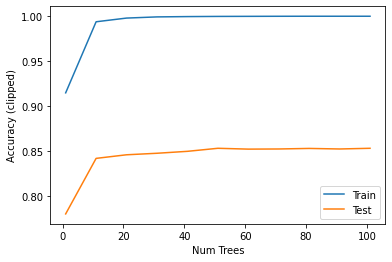

In [16]:
import matplotlib.pyplot as plt

MAX_TREES = 100
STEP_SIZE = 10

num_trees = list(range(1, MAX_TREES + STEP_SIZE, STEP_SIZE))
train_accs = []
test_accs = []

model = RandomForestClassifier(warm_start=True, max_features=10)  # Use last iteration to start next

for i in num_trees:
    print(i)
    model.set_params(n_estimators=i)

    model.fit(train_data, train_labels)

    train_predictions = model.predict(train_data)
    test_predictions = model.predict(test_data)

    train_accs.append(accuracy_score(train_labels, train_predictions))
    test_accs.append(accuracy_score(test_labels, test_predictions))

# Plot
fig, ax = plt.subplots(1)
ax.plot(num_trees, train_accs, label="Train")
ax.plot(num_trees, test_accs, label="Test")

ax.set_xlabel("Num Trees")
ax.set_ylabel("Accuracy (clipped)")
ax.legend()

In [17]:
test_accs

[0.7802855826807923,
 0.8420082911100876,
 0.8460003070781514,
 0.8476892369107938,
 0.8498387839705205,
 0.8532166436358053,
 0.8522954091816367,
 0.8524489482573315,
 0.8530631045601106,
 0.8524489482573315,
 0.8532166436358053]

/var/folders/tw/vy29vh0s7k58spccwy063k100000gn/T/ipykernel_8165/1715958787.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = np.log((1 - error) / error)
/var/folders/tw/vy29vh0s7k58spccwy063k100000gn/T/ipykernel_8165/1715958787.py:28: RuntimeWarning: invalid value encountered in double_scalars
  weights = [weights[i] * np.exp(alpha * errors[i]) for i in range(len(data))]


ValueError: Input sample_weight contains NaN.

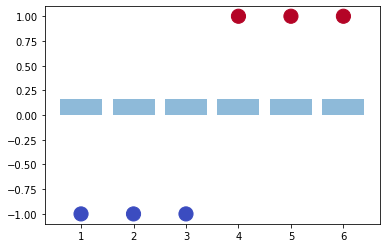

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the sample weights
weights = [1/6 for _ in range(6)]

# Sample data
data = [(1, -1), (2, -1), (3, -1), (4, 1), (5, 1), (6, 1)]
xs = np.array([d[0] for d in data]).reshape(-1, 1)
ys = np.array([d[1] for d in data]).reshape(-1, 1)

# Plot the sample data
plt.scatter([x[0] for x in data], [x[1] for x in data], c=[x[1] for x in data], cmap='coolwarm', s=200)

# Plot the initial weights
plt.bar([1, 2, 3, 4, 5, 6], weights, alpha=0.5)

# Train the weak classifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(xs, ys, sample_weight=weights)
predictions = clf.predict(xs)

# Calculate the error and update the weights
errors = [int(predictions[i] != data[i][1]) for i in range(len(data))]
error = np.dot(weights, errors) / np.sum(weights)
alpha = np.log((1 - error) / error)
weights = [weights[i] * np.exp(alpha * errors[i]) for i in range(len(data))]
weights /= np.sum(weights)

# Plot the updated weights
plt.bar([1, 2, 3, 4, 5, 6], weights, alpha=0.5)

# Train another weak classifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(xs, ys, sample_weight=weights)
predictions = clf.predict(xs)

# Calculate the error and update the weights
errors = [int(predictions[i] != data[i][1]) for i in range(len(data))]
error = np.dot(weights, errors) / np.sum(weights)
alpha = np.log((1 - error) / error)
weights = [weights[i] * np.exp(alpha * errors[i]) for i in range(len(data))]
weights /= np.sum(weights)

# Plot the final weights
plt.bar([1, 2, 3, 4, 5, 6], weights, alpha=0.5)

# Plot the decision boundary of the final classifier
plt.plot([0, 7], [0.5, 0.5], '--', color='black')

plt.show()


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree

X_LIM = (0, 10)
Y_LIM = (0, 9)

def animl_plot_tree(data, tree, tree_title, figsize, **kwargs):
    fig = plt.figure(figsize=figsize)

    gs =  GridSpec(2, 2, **kwargs)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])

    # First plot the tree

    # Then plot the data and boundary
    def data_scatter(ax):
        pos_data = data[data["label"] == "positive"]
        neg_data = data[data["label"] == "negative"]
        ax.scatter(x=pos_data["feature1"], y=pos_data["feature2"],
                   c="blue", marker="+", s=100)
        ax.scatter(x=neg_data["feature1"], y=neg_data["feature2"],
                   c="orange", marker="x", s=100)
        ax.set_xlabel("feature1")
        ax.set_ylabel("feature2")
        ax.set_xlim(X_LIM)
        ax.set_ylim(Y_LIM)

    # Plot data
    data_scatter(ax2)
    ax2.set_title("Synthetic Data")

    # Plot boundary
    

    preds = tree.predict(data[["feature1", "feature2"]])
    accuracy = accuracy_score(data["label"], preds)

    ax3.set_title(f"Decision Boundary (Acc: {accuracy:.2f})")

In [7]:
def adaboost_decision(data, dataset_weights, model=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1)

    pos_data = data[data["label"] == "positive"]
    pos_weights = dataset_weights[data["label"] == "positive"]
    neg_data = data[data["label"] == "negative"]
    neg_weights = dataset_weights[data["label"] == "negative"]

    # Hard coding some numbers to scale weights to meaningful sizes
    effective_weight_max = 0.1
    start_s = 50
    effective_max_s = 200
    pos_s = start_s + effective_max_s * pos_weights / effective_weight_max
    neg_s = start_s + effective_max_s * neg_weights / effective_weight_max


    ax.scatter(x=pos_data["feature1"], y=pos_data["feature2"],
                c="blue", marker="+", s=pos_s)
    ax.scatter(x=neg_data["feature1"], y=neg_data["feature2"],
                c="orange", marker="x", s=neg_s) #weight_scale * neg_weights)

    if model:
        DecisionBoundaryDisplay.from_estimator(
            model, data[["feature1", "feature2"]], response_method="predict",
            xlabel="feature1", ylabel="feature2",
            alpha=0.1, colors=["orange", "black", "blue", "black"],
            ax=ax)
    ax.set_xlabel("feature1")
    ax.set_ylabel("feature2")
    ax.set_xlim(X_LIM)
    ax.set_ylim(Y_LIM)

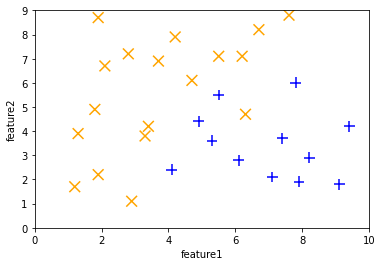

In [29]:
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np

class AnimlAdaBoost:
    def __init__(self, models=None, model_weights=None):
        self.models = models if models else []
        self.model_weights = model_weights if model_weights else []
        self.is_fitted_ = True
        self.classes_ = ["negative", "positive"]
        self.limit = None

    def add_tree(self, tree, model_weight):
        if self.limit is not None:
            raise ValueError("Unable to add trees if limit is set. Set to None first")
        self.models.append(tree)
        self.model_weights.append(model_weight)

    def fit(self, X, y):
        raise NotImplemented()

    def limit_to(self, i):
        self.limit = i

    def predict(self, data):
        # Assumes binary positive/negative predictions
        total_preds = np.zeros(len(data))

        limit = len(self.models) if self.limit is None else self.limit

        for i in range(limit):
            model = self.models[i]
            weight = self.model_weights[i]
            preds = model.predict(data)
            preds = np.array([+1 if pred == "positive" else -1 for pred in preds])
            total_preds = total_preds + weight * preds

        result = np.array(["positive" if total_pred > 0 else "negative" for total_pred in total_preds])
        return result


def train_stump(data, labels, dataset_weights):
    # Train the weak classifier
    stump = DecisionTreeClassifier(max_depth=1)
    stump.fit(data, labels, sample_weight=dataset_weights)
    predictions = stump.predict(data)

    # Calculate the error and update the weights
    errors = predictions != labels
    weighted_error = np.dot(dataset_weights, errors) / np.sum(dataset_weights)

    model_weight = np.log((1 - weighted_error) / weighted_error) / 2

    multiplier = 2 * errors - 1  # 1 for correct, -1 for error
    dataset_weights =  dataset_weights * np.exp(model_weight * multiplier)
    dataset_weights = dataset_weights / np.sum(dataset_weights)

    return stump, model_weight, dataset_weights

# Sample data
data = pd.read_csv("../book_source/source/classification/ensembles/synthetic.csv")
features = ["feature1", "feature2"]
label = "label"

# Initialize the sample weights
dataset_weights = np.array([1/len(data) for _ in range(len(data))])

# Plot the sample data
fig, ax = plt.subplots(1)
adaboost_decision(data, dataset_weights, ax=ax)

MAX_TREES = 300
ensemble = AnimlAdaBoost()
for i in range(MAX_TREES):
    tree, model_weight, dataset_weights = train_stump(data[features], data[label], dataset_weights)
    ensemble.add_tree(tree, model_weight)

    #fig, ax = plt.subplots(1, figsize=(15, 10))
    #adaboost_decision(data, dataset_weights, model=tree, ax=ax)

    #if i % 10 == 0:
    #    fig, ax = plt.subplots(1, figsize=(15, 10))
    #    adaboost_decision(data, dataset_weights, model=ensemble, ax=ax)

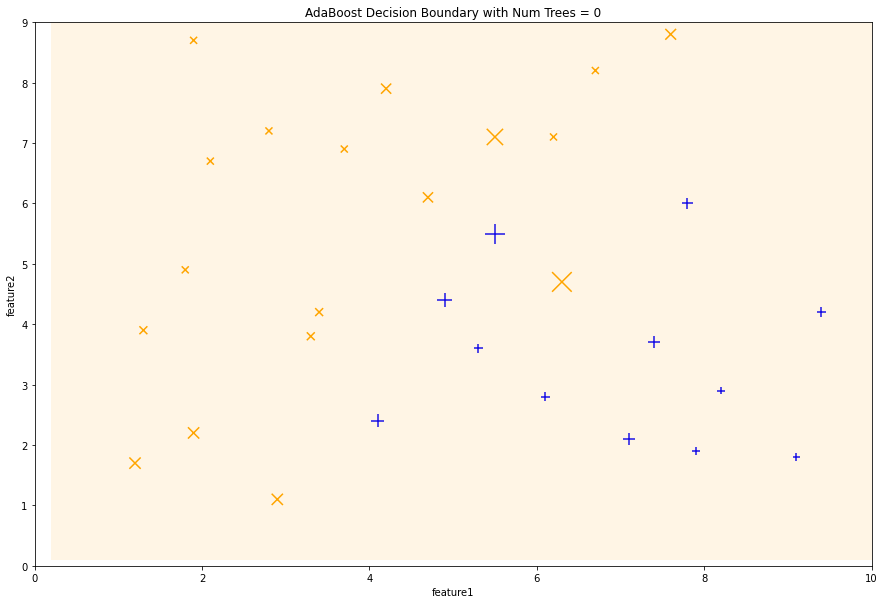

In [30]:
from matplotlib.animation import FuncAnimation


checkpoints = list(range(11)) + list(range(20, MAX_TREES + 1, 10))

fig, ax = plt.subplots(1, figsize=(15, 10))

# function takes frame as an input
def animation_func(frame):
    ax.clear()
    ensemble.limit_to(checkpoints[frame])
    adaboost_decision(data, dataset_weights, model=ensemble, ax=ax)
    ax.set_title(f"AdaBoost Decision Boundary with Num Trees = {checkpoints[frame]}")

anim_created = FuncAnimation(fig, animation_func, frames=len(checkpoints), interval=750)



In [31]:
anim_created.save(filename="adaboost_decision.mp4", writer="ffmpeg")

In [32]:

import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier

# Load in data, and separate features and label
data = pd.read_csv("../book_source/source/classification/ensembles/income.csv")
label = "income"
features = data.columns[data.columns != label]

# Train test split
train_data, test_data, train_labels, test_labels = train_test_split(
    data[features], data[label], test_size=0.2)

# Transform categorical features. Note that we use the same transformation
# on both train and test
encoder = OneHotEncoder(handle_unknown='ignore')\
    .fit(train_data)
train_data = encoder.transform(train_data)
test_data = encoder.transform(test_data)

# Train model


# Make predictions
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

print("Train Accuracy:", accuracy_score(train_labels, train_predictions))
print("Test  Accuracy:", accuracy_score(test_labels, test_predictions))

Train Accuracy: 0.8823710073710074
Test  Accuracy: 0.8647320743129127


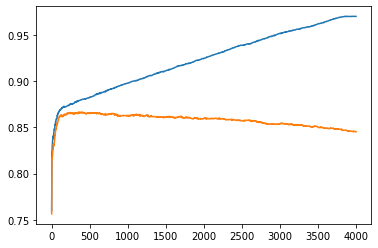

In [41]:
def learning_curve(ensemble, data, labels):
    staged_predictions = ensemble.staged_predict(data)

    accuracies = []
    for predictions in staged_predictions:
        accuracy = (predictions == labels).sum() / len(predictions)
        accuracies.append(accuracy)
    return accuracies

model = AdaBoostClassifier(n_estimators=4000)
model.fit(train_data, train_labels)

train_accs = learning_curve(model, train_data, train_labels)
test_accs = learning_curve(model, test_data, test_labels)

num_trees = list(range(1, len(train_accs) + 1))

fig, ax = plt.subplots(1)
ax.plot(num_trees, train_accs, label="Train")
ax.plot(num_trees, test_accs, label="Test")


In [42]:
max(test_accs)

0.8662674650698603

In [43]:

max(test_accs[-100:])

0.8461538461538461